# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata = pd.read_csv(mouse_metadata_path)

# Display the data table for preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [16]:
# Checking the number of mice.
combined_Data_df = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')
num_Mice = combined_Data_df['Mouse ID'].nunique() 
num_Mice

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_Data_df.loc[combined_Data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = combined_Data_df.loc[combined_Data_df['Mouse ID'] == 'g989', :]
duplicate_mice_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_Data_df[combined_Data_df['Mouse ID'] != "g989"]
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Checking the number of mice in the clean DataFrame.
clean_df = new_df['Mouse ID'].nunique()
clean_df

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped = new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean_tumor = grouped.mean()
median_tumor = grouped.median()
var_tumor = grouped.var()
std_tumor = grouped.std()
SEM_tumor = grouped.sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sum_stat_df = pd.DataFrame({"mean_tumor":mean_tumor,
                            "median_tumor":median_tumor,
                            "var_tumor":var_tumor,
                            "std_tumor":std_tumor,
                            "SEM_tumor":SEM_tumor
})
sum_stat_df

,mean_tumor,median_tumor,var_tumor,std_tumor,SEM_tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_agg =  new_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total # of rows for each regimen')

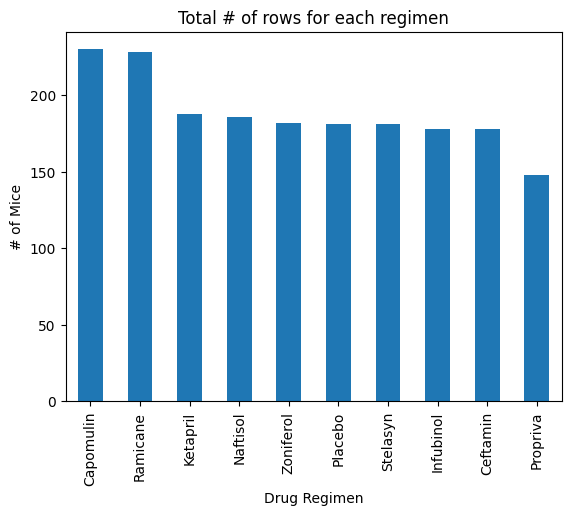

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data_points = new_df["Drug Regimen"].value_counts()
panda_plot = data_points.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.title("Total # of rows for each regimen")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

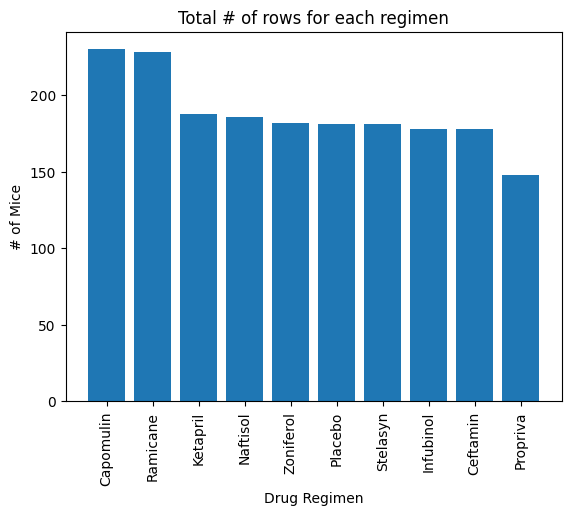

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = data_points.index.values
y_axis = data_points.values
plt.bar(x_axis, y_axis, align = 'center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.title("Total # of rows for each regimen")
plt.xticks(rotation="vertical")

Text(0.5, 1.0, 'Sex distribution of mice')

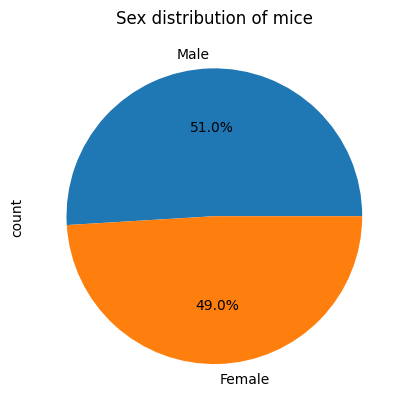

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = new_df["Sex"].value_counts()
sex_data.plot.pie(autopct= "%1.1f%%")
plt.title("Sex distribution of mice")

Text(0, 0.5, 'Sex')

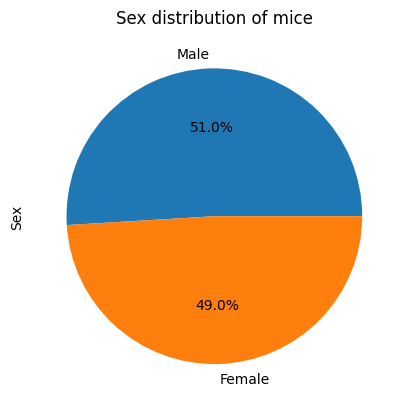

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = ['Male', 'Female']
plot = sex_data.plot.pie(y='Count', autopct= "%1.1f%%")
plt.title("Sex distribution of mice")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = new_df.groupby('Mouse ID')
greatest_timepoint = greatest_timepoint['Timepoint'].max()
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(greatest_timepoint_df, new_df, on = ['Mouse ID', 'Timepoint'])
tumor_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
potential_outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    tumor_vol = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    potential_outliers.extend(outliers)
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    potential_outliers.extend(outliers)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset     
    # Determine outliers using upper and lower bounds
    print(f"{treatment}:")
    print(f"  The lower quartile of tumor volume is: {lowerq}")
    print(f"  The upper quartile of tumor volume is: {upperq}")
    print(f"  The interquartile range of tumor volume is: {iqr}")
    print(f"  Values below {lower_bound} could be outliers.")
    print(f"  Values above {upper_bound} could be outliers.")
    if len(outliers) > 0:
        print(f"  Potential outliers: {outliers}")
print("\nPotential Outliers across Treatments:")
print(potential_outliers)

Capomulin:
  The lower quartile of tumor volume is: 32.37735684
  The upper quartile of tumor volume is: 40.1592203
  The interquartile range of tumor volume is: 7.781863460000004
  Values below 25.355449580000002 could be outliers.
  Values above 87.66645829999999 could be outliers.
  Potential outliers: 174    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane:
  The lower quartile of tumor volume is: 31.56046955
  The upper quartile of tumor volume is: 40.65900627
  The interquartile range of tumor volume is: 9.098536719999998
  Values below 25.355449580000002 could be outliers.
  Values above 87.66645829999999 could be outliers.
  Potential outliers: 96    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol:
  The lower quartile of tumor volume is: 54.04860769
  The upper quartile of tumor volume is: 65.52574285
  The interquartile range of tumor volume is: 11.477135160000003
  Values below 25.355449580000002 could be outliers.
  Values above 87.66645829999999 cou

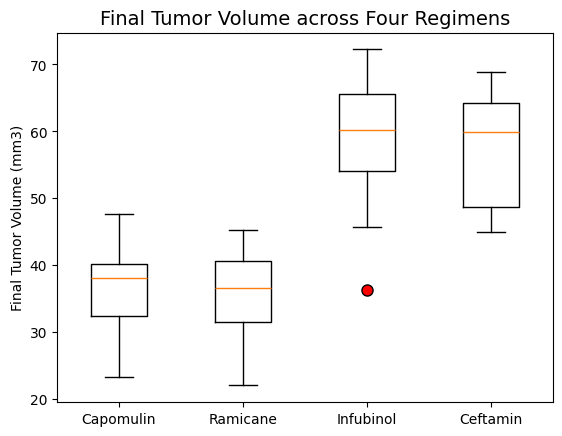

In [90]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]
circle_marker = dict(markerfacecolor='r', marker='o', markersize=8)
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, flierprops=circle_marker)
ax1.set_title("Final Tumor Volume across Four Regimens", fontsize=14)
ax1.set_xticklabels(treatments_list)
plt.show()

## Line and Scatter Plots

In [91]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == "Capomulin"].head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


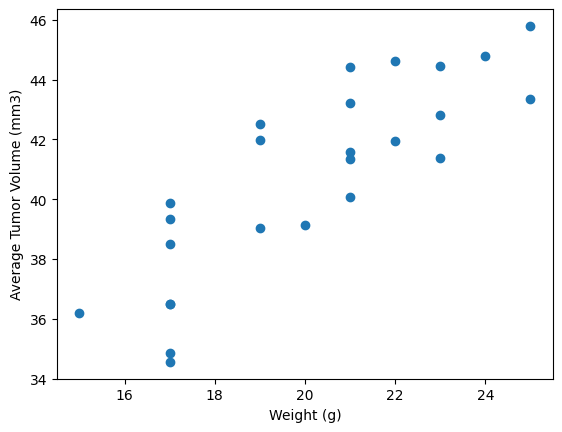

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = new_df.loc[new_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient is 0.84.


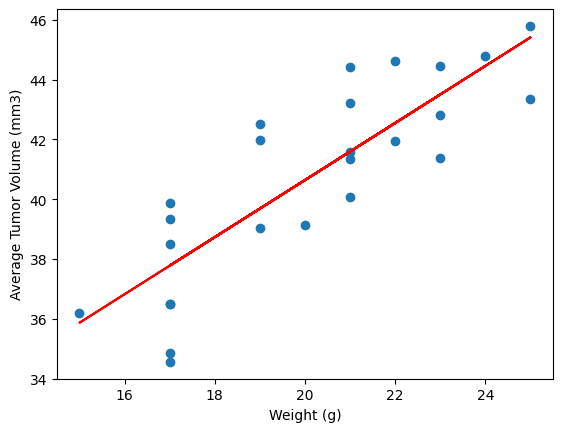

In [98]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation coefficient is {round(correlation[0], 2)}.")
plt.show()